# Project 3
## Name Classification 
### Keeno Glanville

In [71]:
#libraries
import random
import matplotlib.pyplot as plt
from nltk.corpus import names
import nltk
import pandas as pd
random.seed(326)

In [72]:
# Load dataset
# Split the Names Corpus into three subsets
nltk.download('names')
name_list = [(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')]
random.shuffle(name_list)




[nltk_data] Downloading package names to
[nltk_data]     C:\Users\keeno\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [73]:
train_set = name_list[:6900]
devtest_set = name_list[6900:7400]
test_set = name_list[7400:]

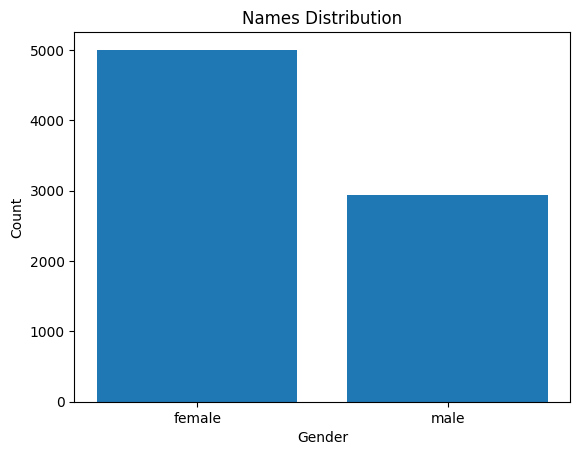

In [74]:
# Class Distribution
class_distribution = nltk.FreqDist(gender for _, gender in name_list)
plt.bar(class_distribution.keys(), class_distribution.values())
plt.title('Names Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

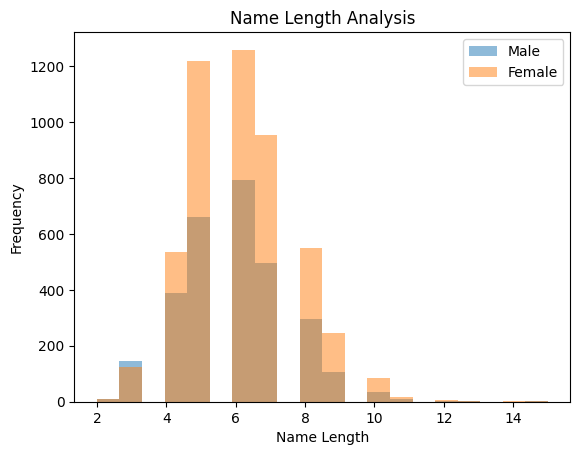

In [75]:
# Name Length 
male_name_lengths = [len(name) for name, gender in name_list if gender == 'male']
female_name_lengths = [len(name) for name, gender in name_list if gender == 'female']
plt.hist(male_name_lengths, bins=20, alpha=0.5, label='Male')
plt.hist(female_name_lengths, bins=20, alpha=0.5, label='Female')
plt.title('Name Length Analysis')
plt.xlabel('Name Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

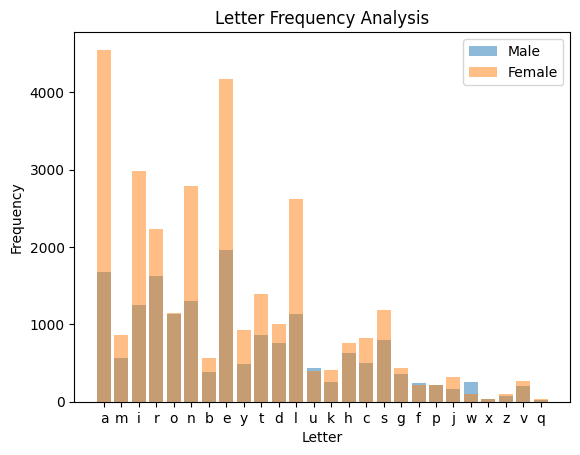

In [76]:
# Letter Frequency Analysis
male_letters = [c for name in names.words('male.txt') for c in name.lower() if c.isalpha()]
female_letters = [c for name in names.words('female.txt') for c in name.lower() if c.isalpha()]
male_letter_freq = nltk.FreqDist(male_letters)
female_letter_freq = nltk.FreqDist(female_letters)
plt.bar(male_letter_freq.keys(), male_letter_freq.values(), alpha=0.5, label='Male')
plt.bar(female_letter_freq.keys(), female_letter_freq.values(), alpha=0.5, label='Female')
plt.title('Letter Frequency Analysis')
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.legend()
plt.show()

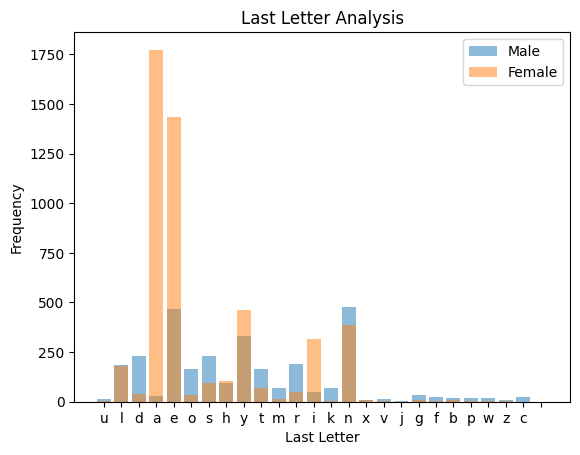

In [77]:
# Last Letter Analysis
male_last_letters = [name[-1].lower() for name, gender in name_list if gender == 'male']
female_last_letters = [name[-1].lower() for name, gender in name_list if gender == 'female']
male_last_letter_freq = nltk.FreqDist(male_last_letters)
female_last_letter_freq = nltk.FreqDist(female_last_letters)
plt.bar(male_last_letter_freq.keys(), male_last_letter_freq.values(), alpha=0.5, label='Male')
plt.bar(female_last_letter_freq.keys(), female_last_letter_freq.values(), alpha=0.5, label='Female')
plt.title('Last Letter Analysis')
plt.xlabel('Last Letter')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [78]:
def gender_features(name):
    features = {}
    
    features['last_letter'] = name[-1].lower()
    features['last_two_letters'] = name[-2:].lower()
    features['first_letter'] = name[0].lower()
    features['name_length'] = len(name)
    return features



In [79]:
# Apply the gender_features function to each name in the Name Corpus
feature_data = [gender_features(name) for (name, _) in name_list]

# Create a DataFrame from the feature data
df = pd.DataFrame(feature_data)

# Print the DataFrame
df.head(10)

,last_letter,last_two_letters,first_letter,name_length
0,e,le,m,8
1,u,ou,j,8
2,e,je,m,5
3,a,ia,t,4
4,l,al,n,9
5,d,nd,r,8
6,i,mi,p,5
7,n,nn,s,6
8,i,ai,k,3
9,e,ie,m,6


In [80]:
# Create feature sets using the defined feature extraction function
train_features = [(gender_features(name), gender) for (name, gender) in train_set]
devtest_features = [(gender_features(name), gender) for (name, gender) in devtest_set]
test_features = [(gender_features(name), gender) for (name, gender) in test_set]

In [81]:
# Train the Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(train_features)

In [82]:
# Evaluate the classifier on the dev-test set
devtest_accuracy = nltk.classify.accuracy(classifier, devtest_features)
print("Dev-Test Accuracy:", devtest_accuracy)

Dev-Test Accuracy: 0.804


In [83]:
# Evaluate the classifier on the test set
test_accuracy = nltk.classify.accuracy(classifier, test_features)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7996323529411765


Update the model with more features


In [84]:
# Define feature extraction function with additional features
def gender_features(name):
    features = {}
    
    features['last_letter'] = name[-1].lower()
    features['last_two_letters'] = name[-2:].lower()
    features['first_letter'] = name[0].lower()
    features['name_length'] = len(name)
    features['first_two_letters'] = name[:2].lower()
    features['double_letters'] = len([c for c in name if c*2 in name])
    return features

# Create feature sets using the defined feature extraction function
train_features = [(gender_features(name), gender) for (name, gender) in train_set]
devtest_features = [(gender_features(name), gender) for (name, gender) in devtest_set]
test_features = [(gender_features(name), gender) for (name, gender) in test_set]

In [85]:
# Apply the gender_features function to each name in the Name Corpus
feature_data = [gender_features(name) for (name, _) in name_list]

# Create a DataFrame from the feature data
df = pd.DataFrame(feature_data)

# Print the DataFrame
df.head(10)

,last_letter,last_two_letters,first_letter,name_length,first_two_letters,double_letters
0,e,le,m,8,ma,2
1,u,ou,j,8,je,0
2,e,je,m,5,ma,0
3,a,ia,t,4,th,0
4,l,al,n,9,na,0
5,d,nd,r,8,ro,0
6,i,mi,p,5,pa,2
7,n,nn,s,6,su,2
8,i,ai,k,3,ka,0
9,e,ie,m,6,ma,0


In [86]:
# Train the classifier (example: using NaiveBayes)
classifier = nltk.NaiveBayesClassifier.train(train_features)

In [87]:
# Evaluate the classifier on the dev-test set
devtest_accuracy = nltk.classify.accuracy(classifier, devtest_features)
print("Dev-Test Accuracy:", devtest_accuracy)

Dev-Test Accuracy: 0.838


In [88]:
# Evaluate the classifier on the test set
test_accuracy = nltk.classify.accuracy(classifier, test_features)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8125


Update with even more features

In [89]:
# Define feature extraction function with additional features
def gender_features(name):
    features = {}
    
    features['last_letter'] = name[-1].lower()
    features['last_two_letters'] = name[-2:].lower()
    features['first_letter'] = name[0].lower()
    features['name_length'] = len(name)
    features['first_two_letters'] = name[:2].lower()
    features['double_letters'] = len([c for c in name if c*2 in name])
    features['vowel_count'] = len([c for c in name.lower() if c in 'aeiou'])
    features['consonant_count'] = len([c for c in name.lower() if c.isalpha() and c not in 'aeiou'])
    features['has_a'] = 'a' in name.lower()
    features['has_e'] = 'e' in name.lower()
    return features

train_features = [(gender_features(name), gender) for (name, gender) in train_set]
devtest_features = [(gender_features(name), gender) for (name, gender) in devtest_set]
test_features = [(gender_features(name), gender) for (name, gender) in test_set]

In [90]:
# Apply the gender_features function to each name in the Name Corpus
feature_data = [gender_features(name) for (name, _) in name_list]

# Create a DataFrame from the feature data
df = pd.DataFrame(feature_data)

# Print the DataFrame
df.head(10)

,last_letter,last_two_letters,first_letter,name_length,first_two_letters,double_letters,vowel_count,consonant_count,has_a,has_e
0,e,le,m,8,ma,2,3,5,True,True
1,u,ou,j,8,je,0,4,3,True,True
2,e,je,m,5,ma,0,2,3,True,True
3,a,ia,t,4,th,0,2,2,True,False
4,l,al,n,9,na,0,4,5,True,False
5,d,nd,r,8,ro,0,3,5,True,False
6,i,mi,p,5,pa,2,2,3,True,False
7,n,nn,s,6,su,2,2,4,True,False
8,i,ai,k,3,ka,0,2,1,True,False
9,e,ie,m,6,ma,0,4,2,True,True


In [91]:
# Train the classifier (example: using NaiveBayes)
classifier = nltk.NaiveBayesClassifier.train(train_features)

In [92]:
# Evaluate the classifier on the dev-test set
devtest_accuracy = nltk.classify.accuracy(classifier, devtest_features)
print("Dev-Test Accuracy:", devtest_accuracy)

Dev-Test Accuracy: 0.82


In [93]:
# Evaluate the classifier on the test set
test_accuracy = nltk.classify.accuracy(classifier, test_features)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8161764705882353


### The NaiveBayes model is not strongly classifying the names and thus maybe another model could be a stronger alternative

## Decision Tree


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

In [95]:
# Vectorize the feature sets
vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform([features for features, _ in train_features])
y_train = [gender for _, gender in train_features]

X_devtest = vectorizer.transform([features for features, _ in devtest_features])
y_devtest = [gender for _, gender in devtest_features]

X_test = vectorizer.transform([features for features, _ in test_features])
y_test = [gender for _, gender in test_features]

In [96]:
# Train the decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
# Make predictions on dev-test set
devtest_predictions = classifier.predict(X_devtest)
devtest_accuracy = accuracy_score(y_devtest, devtest_predictions)
print("Dev-Test Accuracy:", devtest_accuracy)

Dev-Test Accuracy: 0.77


In [98]:
# Make predictions on test set
test_predictions = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7738970588235294


# Return to NaiveBayes


In [99]:
from nltk.util import ngrams
from nltk.tokenize import SyllableTokenizer
from nltk import NaiveBayesClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

# Strengthened feature engineering
def gender_features(name):
    vowels = len([c for c in name.lower() if c in 'aeiou'])
    consonants = len([c for c in name.lower() if c.isalpha() and c not in 'aeiou'])
    bigrams = [''.join(bigram) for bigram in ngrams(name.lower(), 2)]
    trigrams = [''.join(trigram) for trigram in ngrams(name.lower(), 3)]
    syllables = len(SyllableTokenizer().tokenize(name.lower()))
    
    features = {
        
        'last_letter': name[-1].lower(),
        'last_two_letters': name[-2:].lower(),
        'first_letter': name[0].lower(),
        'name_length': len(name),
        'first_two_letters': name[:2].lower(),
        'double_letters': len([c for c in name if c*2 in name]),
        'vowel_count': len([c for c in name.lower() if c in 'aeiou']),
        'consonant_count': len([c for c in name.lower() if c.isalpha() and c not in 'aeiou']),
        'has_a': 'a' in name.lower(),
        'has_e': 'e' in name.lower(),
        'vowels': vowels,
        'consonants': consonants,
        'bigrams': tuple(bigrams),
        'trigrams': tuple(trigrams),
        'syllables': syllables
    }
    return features

In [100]:
# Apply the gender_features function to each name in the Name Corpus
feature_data = [gender_features(name) for (name, _) in name_list]

# Create a DataFrame from the feature data
df = pd.DataFrame(feature_data)

# Print the DataFrame
df.head(10)

c:\Users\keeno\AppData\Local\Programs\Python\Python310\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: ' '
  warnings.warn(


,last_letter,last_two_letters,first_letter,name_length,first_two_letters,double_letters,vowel_count,consonant_count,has_a,has_e,vowels,consonants,bigrams,trigrams,syllables
0,e,le,m,8,ma,2,3,5,True,True,3,5,"(ma, ar, rc, ce, el, ll, le)","(mar, arc, rce, cel, ell, lle)",3
1,u,ou,j,8,je,0,4,3,True,True,4,3,"(je, ea, an, n-, -l, lo, ou)","(jea, ean, an-, n-l, -lo, lou)",3
2,e,je,m,5,ma,0,2,3,True,True,2,3,"(ma, ar, rj, je)","(mar, arj, rje)",2
3,a,ia,t,4,th,0,2,2,True,False,2,2,"(th, hi, ia)","(thi, hia)",1
4,l,al,n,9,na,0,4,5,True,False,4,5,"(na, at, th, ha, an, ni, ia, al)","(nat, ath, tha, han, ani, nia, ial)",3
5,d,nd,r,8,ro,0,3,5,True,False,3,5,"(ro, os, sa, al, li, in, nd)","(ros, osa, sal, ali, lin, ind)",3
6,i,mi,p,5,pa,2,2,3,True,False,2,3,"(pa, am, mm, mi)","(pam, amm, mmi)",2
7,n,nn,s,6,su,2,2,4,True,False,2,4,"(su, us, sa, an, nn)","(sus, usa, san, ann)",2
8,i,ai,k,3,ka,0,2,1,True,False,2,1,"(ka, ai)","(kai,)",1
9,e,ie,m,6,ma,0,4,2,True,True,4,2,"(ma, au, ud, di, ie)","(mau, aud, udi, die)",2


In [101]:
# Create feature sets using the defined feature extraction function
train_features = [(gender_features(name), gender) for (name, gender) in train_set]
devtest_features = [(gender_features(name), gender) for (name, gender) in devtest_set]
test_features = [(gender_features(name), gender) for (name, gender) in test_set]


c:\Users\keeno\AppData\Local\Programs\Python\Python310\lib\site-packages\nltk\tokenize\sonority_sequencing.py:102: UserWarning: Character not defined in sonority_hierarchy, assigning as vowel: ' '
  warnings.warn(


In [102]:
# Train the Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_features)

In [103]:
# Evaluate the classifier on the dev-test set
devtest_accuracy = nltk.classify.accuracy(classifier, devtest_features)
print("Dev-Test Accuracy:", devtest_accuracy)

Dev-Test Accuracy: 0.786


In [104]:
# Evaluate the classifier on the test set
test_accuracy = nltk.classify.accuracy(classifier, test_features)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7628676470588235


In [105]:
# Display the most informative features
classifier.show_most_informative_features(1000)

Most Informative Features
        last_two_letters = 'na'           female : male   =     94.8 : 1.0
        last_two_letters = 'la'           female : male   =     71.6 : 1.0
        last_two_letters = 'us'             male : female =     61.1 : 1.0
        last_two_letters = 'ia'           female : male   =     50.0 : 1.0
             last_letter = 'a'            female : male   =     35.6 : 1.0
        last_two_letters = 'ld'             male : female =     33.6 : 1.0
        last_two_letters = 'sa'           female : male   =     32.5 : 1.0
        last_two_letters = 'ta'           female : male   =     30.0 : 1.0
        last_two_letters = 'rd'             male : female =     30.0 : 1.0
             last_letter = 'k'              male : female =     27.6 : 1.0
        last_two_letters = 'do'             male : female =     24.8 : 1.0
        last_two_letters = 'ra'           female : male   =     23.9 : 1.0
        last_two_letters = 'rt'             male : female =     21.0 : 1.0

# Conclusion
Our simpler Naive Bayes classification model was more optimal in calssification of gender based on name. This is significant bcasue we ran into the problem of over engineering our features as well as over complicatiing the utilization of our algorithms. This shows us that complex is not always better.